# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [6]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

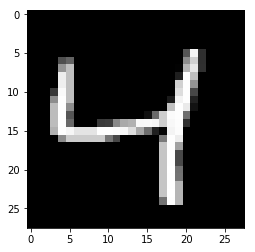

In [8]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [9]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder( tf.float32, (None, image_size), name='inputs' )
targets_ = tf.placeholder( tf.float32, (None, image_size), name='targets' )

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense( inputs_, encoding_dim, activation=tf.nn.relu ) 

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense( encoded, image_size, activation=None )

# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits( logits=logits, labels=targets_ ) 
# Mean of the loss
cost = tf.reduce_mean( loss )

# Adam optimizer
# learning_rate = 0.01
# opt = tf.train.GradientDescentOptimizer( learning_rate=learning_rate ).minimize( cost )
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [10]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [11]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6931
Epoch: 1/20... Training loss: 0.6896
Epoch: 1/20... Training loss: 0.6859
Epoch: 1/20... Training loss: 0.6816
Epoch: 1/20... Training loss: 0.6756
Epoch: 1/20... Training loss: 0.6690
Epoch: 1/20... Training loss: 0.6608
Epoch: 1/20... Training loss: 0.6537
Epoch: 1/20... Training loss: 0.6429
Epoch: 1/20... Training loss: 0.6313
Epoch: 1/20... Training loss: 0.6177
Epoch: 1/20... Training loss: 0.6047
Epoch: 1/20... Training loss: 0.5898
Epoch: 1/20... Training loss: 0.5719
Epoch: 1/20... Training loss: 0.5537
Epoch: 1/20... Training loss: 0.5399
Epoch: 1/20... Training loss: 0.5238
Epoch: 1/20... Training loss: 0.5066
Epoch: 1/20... Training loss: 0.4833
Epoch: 1/20... Training loss: 0.4684
Epoch: 1/20... Training loss: 0.4564
Epoch: 1/20... Training loss: 0.4423
Epoch: 1/20... Training loss: 0.4250
Epoch: 1/20... Training loss: 0.4079
Epoch: 1/20... Training loss: 0.3956
Epoch: 1/20... Training loss: 0.3801
Epoch: 1/20... Training loss: 0.3682
E

Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1922
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.2010
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1916
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1931
Epoch: 1/20... Training loss: 0.1946
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.1955
Epoch: 1/20... Training loss: 0.1853
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1827
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1831
Epoch: 1/20... Training loss: 0.1887
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1879
E

Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1590
Epoch: 2/20... Training loss: 0.1579
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1634
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1616
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1611
Epoch: 2/20... Training loss: 0.1585
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1490
E

Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1404
Epoch: 3/20... Training loss: 0.1449
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1411
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1428
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1418
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1353
E

Epoch: 3/20... Training loss: 0.1249
Epoch: 3/20... Training loss: 0.1260
Epoch: 3/20... Training loss: 0.1220
Epoch: 3/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1274
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1192
E

Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1115
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1109
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1136
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1142
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1116
E

Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1054
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1043
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1108
E

Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.0998
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1106
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1068
E

Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.0991
Epoch: 6/20... Training loss: 0.0998
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.0996
Epoch: 6/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1061
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1003
E

Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0964
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.0950
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0968
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0989
E

Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0927
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0941
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0934
Epoch: 8/20... Training loss: 0.0935
E

Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0928
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.1014
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0997
Epoch: 9/20... Training loss: 0.0966
E

Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0928
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0916
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training lo

Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0918
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0899
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0907
Epoch: 12/20... Training loss: 0.0994
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0999
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0996
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0982
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0895
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0974
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0903
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0903
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0983
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0971
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0883
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0975
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0886
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0977
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0975
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0892
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0981
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0887
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0992
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0882
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.1007
Epoch: 20/20... Training loss: 0.0890
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0971
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

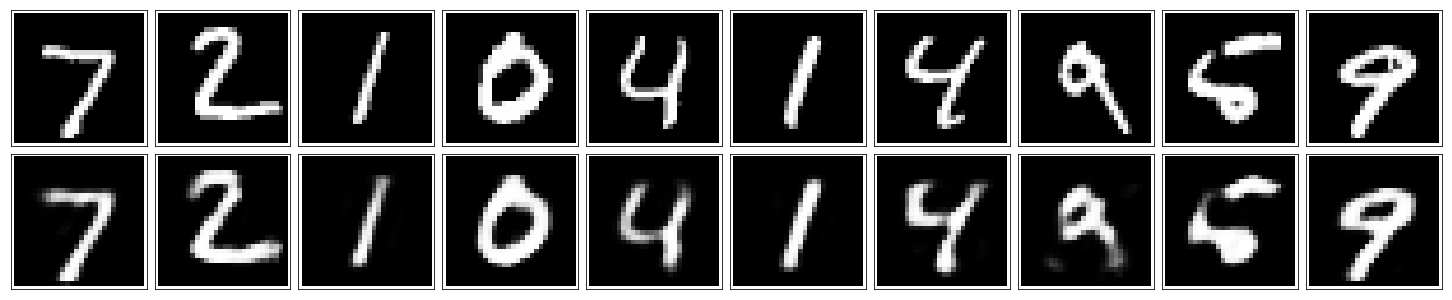

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.